In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Imported libraries needed

In [2]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Take input test data in a data frame

<AxesSubplot:xlabel='Age'>

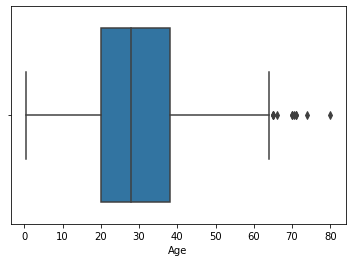

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()
sns.boxplot(x=train_data['Age'])

Take input train data in a dataframe and create a boxplot to identify the outliers

In [4]:
Q1 = train_data['Age'].quantile(0.25)
Q3 = train_data['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (train_data['Age'] >= Q1 - 1.5 * IQR) & (train_data['Age'] <= Q3 + 1.5 *IQR)
train_data=train_data.loc[filter] 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,449.290185,0.411095,2.244666,29.072077,0.519203,0.435277,34.785093
std,258.604497,0.492383,0.835397,13.728478,0.934836,0.858015,53.255433
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.741700
75%,678.500000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,512.329200


Removed the rows having outlier Age column in train dataset

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7547892720306514


Calculated the percentage of women survived.

In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.2081447963800905


Calculated the percentage of men survived.

In [7]:
train_data['Age'].fillna(value=train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(value=test_data['Age'].median(), inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)
test_data['Fare'].fillna(value=test_data['Fare'].median(), inplace=True)
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


I could see that there are missing values in Age column of train_data and test_data dataset. Also, there are missing values in Fare column of test_data  dataset. Therefore, I applied median value to missing values of these columns. Secondly, Cabin and Name columns are not being used for our calculation of passenger’s survival. Therefore, I dropped these columns from our train_data and test_data.

In [8]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X['Age'] = train_data['Age']
X['Fare'] = train_data['Fare']

X_test = pd.get_dummies(test_data[features])
X_test['Age'] = test_data['Age']
X_test['Fare'] = test_data['Fare']

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print(output.count())
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

PassengerId    418
Survived       418
dtype: int64
Your submission was successfully saved!


Applied the Random Forest Classifier algorithm.